# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Reading data frame and understanding data

In [4]:
df = pd.read_csv('abalone.csv')

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [7]:
df.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2850,M,0.630,0.485,0.160,1.2430,0.6230,0.2750,0.3000,10
1835,I,0.410,0.335,0.105,0.3305,0.1405,0.0640,0.1050,7
3896,M,0.760,0.575,0.190,1.8290,0.7035,0.3860,0.5600,14
2705,M,0.700,0.550,0.200,1.5230,0.6930,0.3060,0.4405,13
1926,M,0.615,0.470,0.145,1.0285,0.4435,0.2825,0.2850,11
2121,I,0.475,0.360,0.110,0.4555,0.1770,0.0965,0.1450,9
2332,F,0.515,0.420,0.135,0.6295,0.2815,0.1270,0.2150,9
4126,M,0.550,0.420,0.145,0.7385,0.3210,0.1485,0.2520,11
1532,I,0.285,0.210,0.055,0.1010,0.0415,0.0170,0.0335,5
4095,F,0.635,0.485,0.155,1.0730,0.4670,0.1975,0.3500,11


In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

As per problem statement, out output variable in continuous number. So it is regression problem.

# Exploring five number summery of data

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.shape

(4177, 9)

# EDA

## Scatterplot 

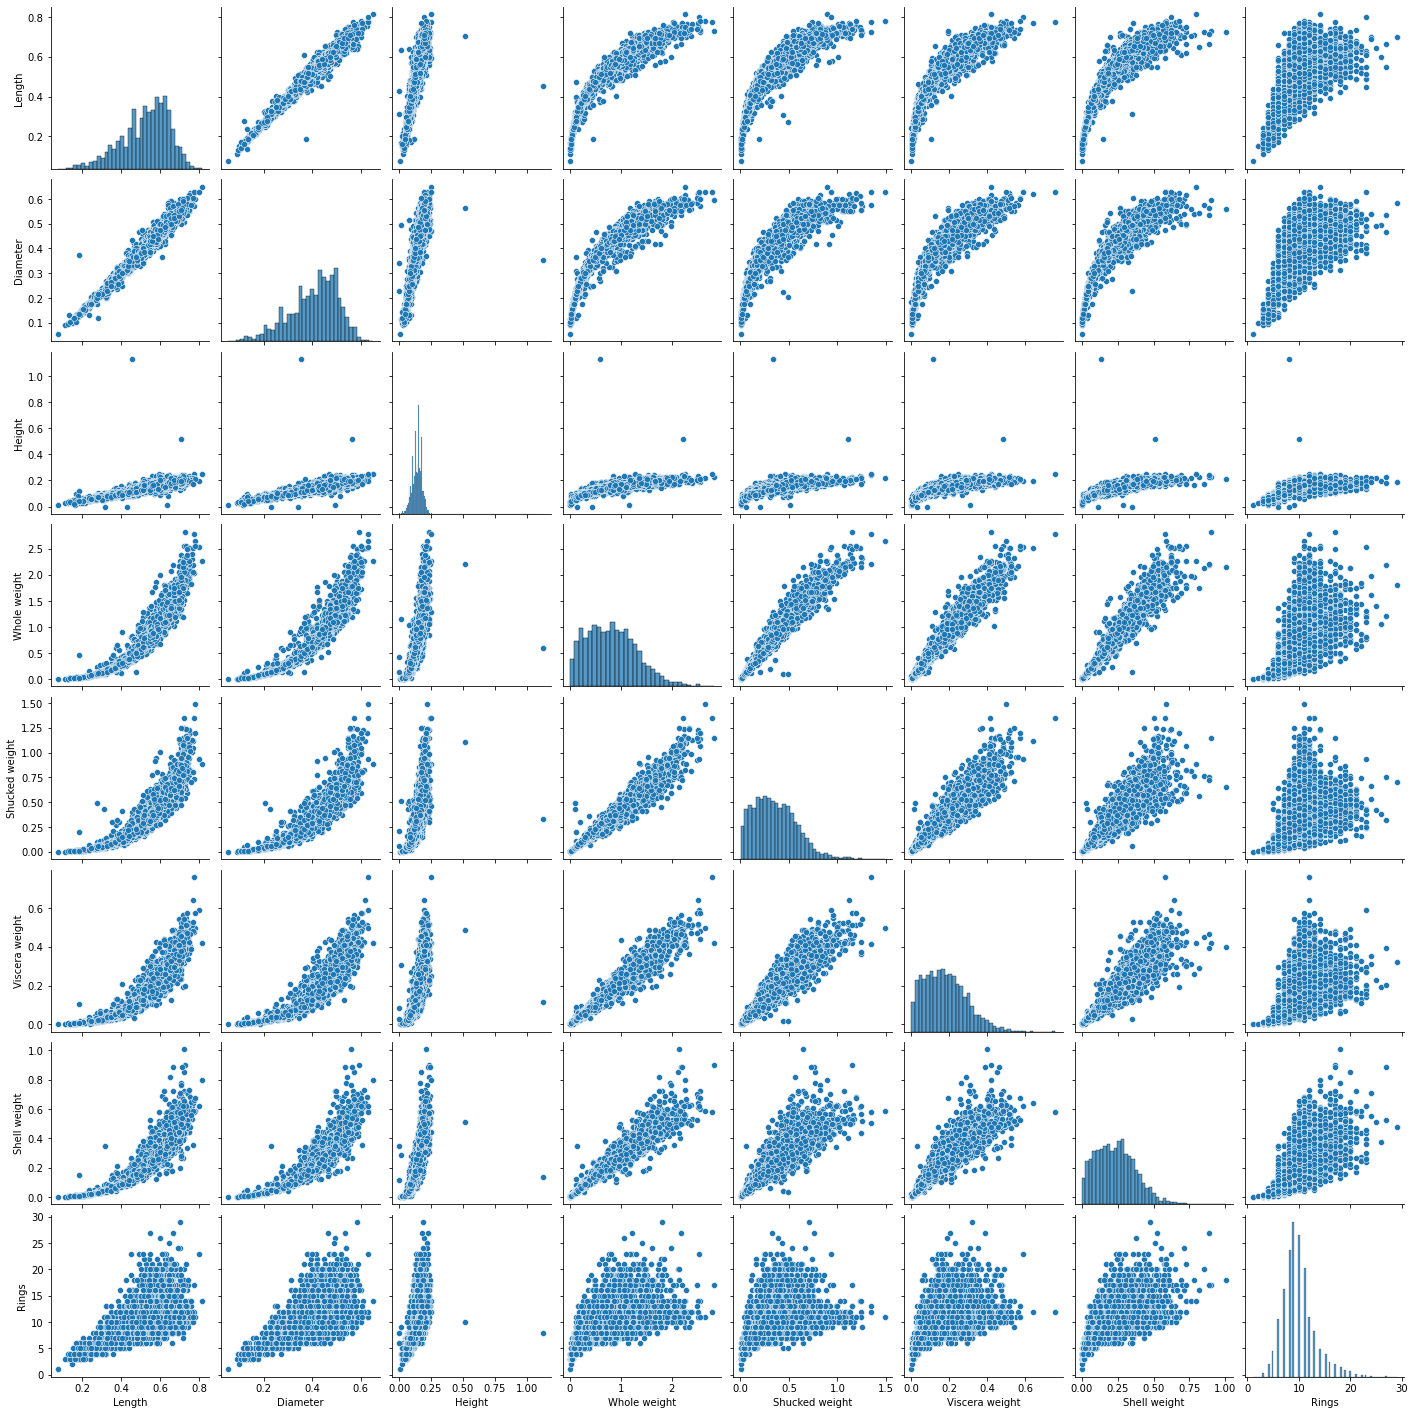

In [11]:
sns.pairplot(df)

## Observations:

### From above results it is clear that all the independant variables have positive relationship with Rings our target

In [12]:
# checking null values
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


### Data distribtion and understanding skewness from bar plots

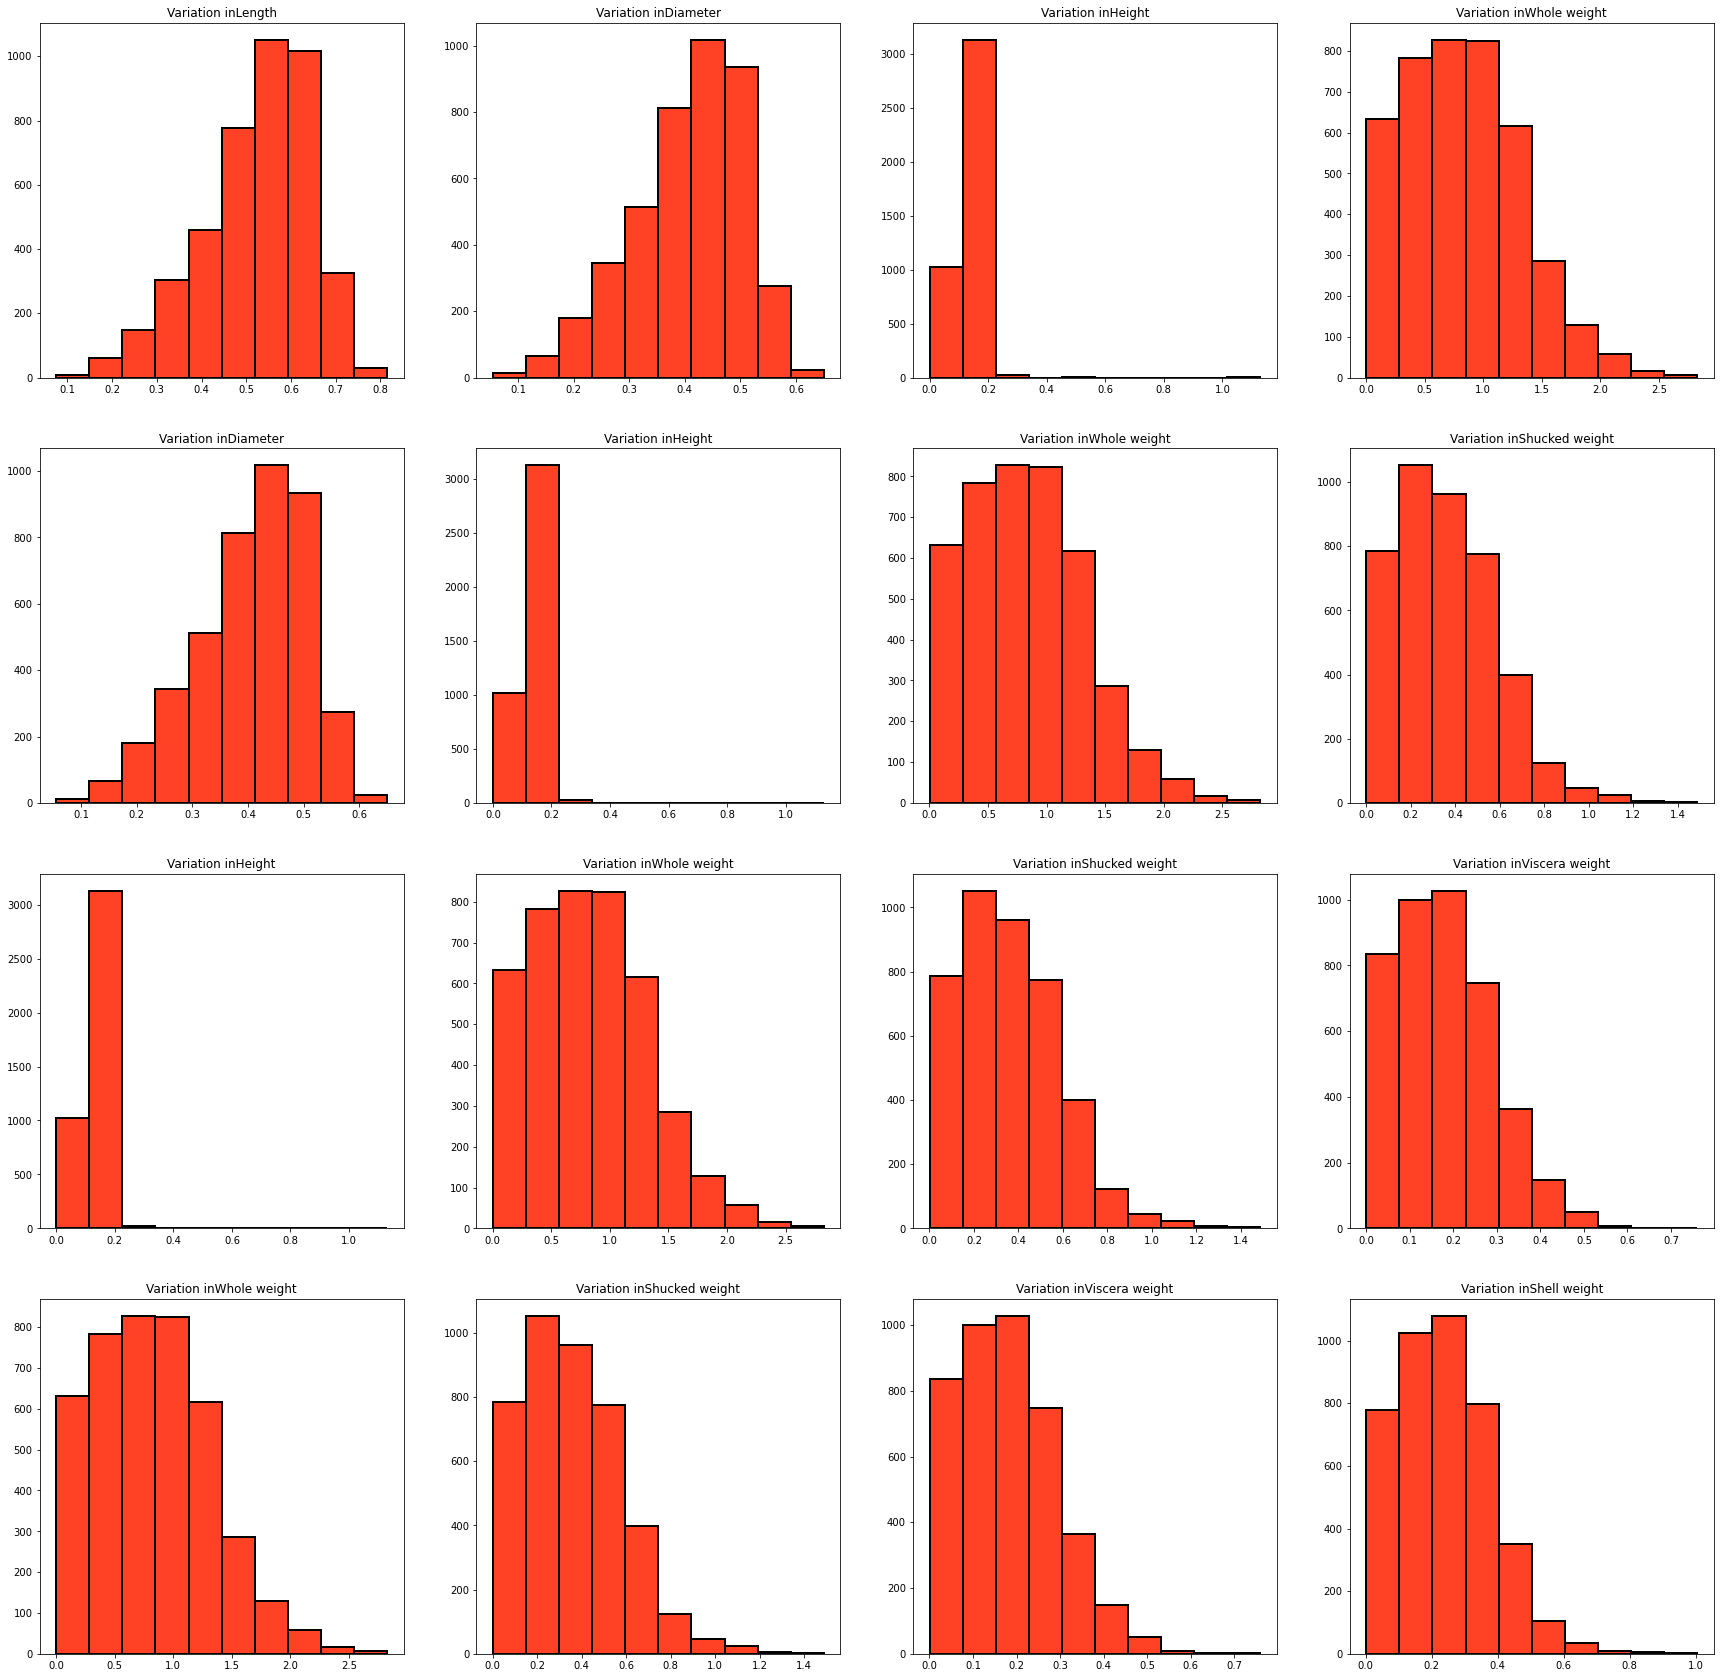

In [14]:
# using a histogram.
fig,axes=plt.subplots(4,4)
columns=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']
for i in range (4):
    for j in range (4):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation in'+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(30,30)
# fig.tight_layout()

In [15]:
i = 0
features= df.drop(['Rings','Sex'],axis=1)
y1= df['Rings']

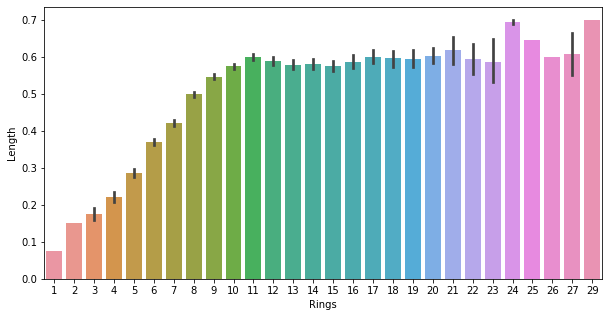

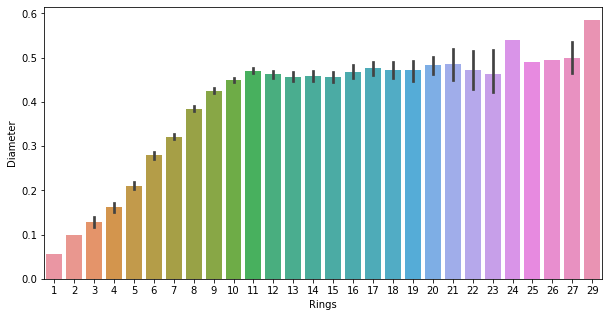

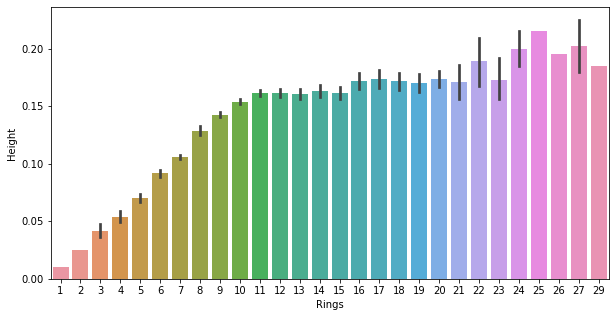

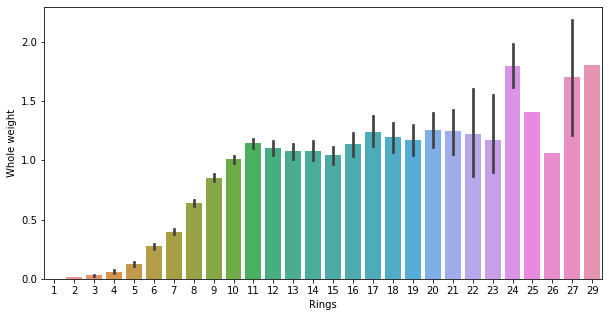

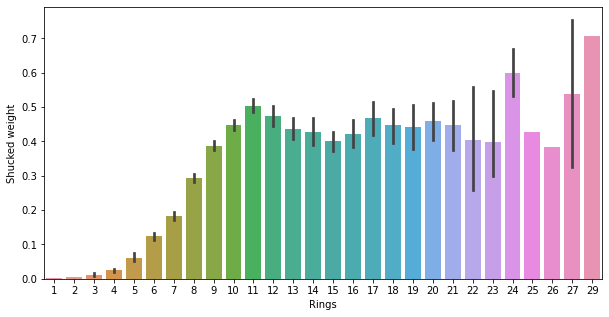

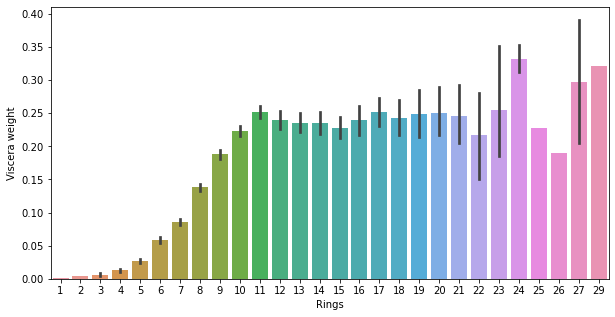

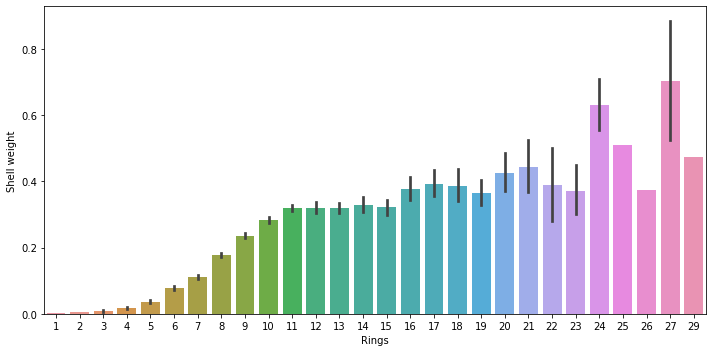

In [16]:
for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=y1,y=col[i],data=df)
plt.tight_layout()
plt.show()

## Count Plot for gender

In [17]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

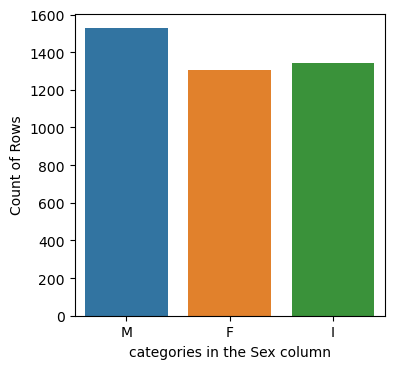

In [18]:
plt.figure(figsize=(4,4), dpi=100)
sns.countplot(x ='Sex',data=df)
plt.xlabel('categories in the Sex column')
plt.ylabel('Count of Rows')
plt.show()

### all data is almost balanced. All data points refers to all three categories

## Encoding Gender feature for further processing

In [19]:
le = LabelEncoder()

In [20]:
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
df.Sex.value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [22]:
le.inverse_transform([0, 1, 2])  # 0= Female, 1=Infant and 2=Male

array(['F', 'I', 'M'], dtype=object)

# Checking correlation

<AxesSubplot:>

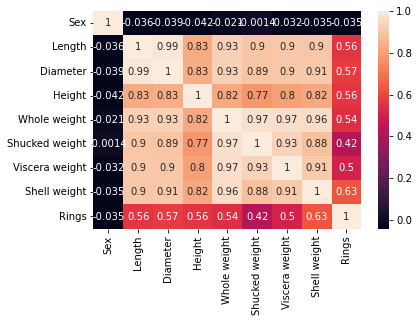

In [23]:
sns.heatmap(df.corr(), annot=True)

In [24]:
df.corr()["Rings"].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

## Observations:

### All the independant variables are showing high positive correlation with the Rings target variable apart from 'Sex' Column which is a categorical encoded variable.

### It looks like the features column is showing multi collinearity. We will use VIF method to check multi collinearity

# Checking Outliers

<AxesSubplot:>

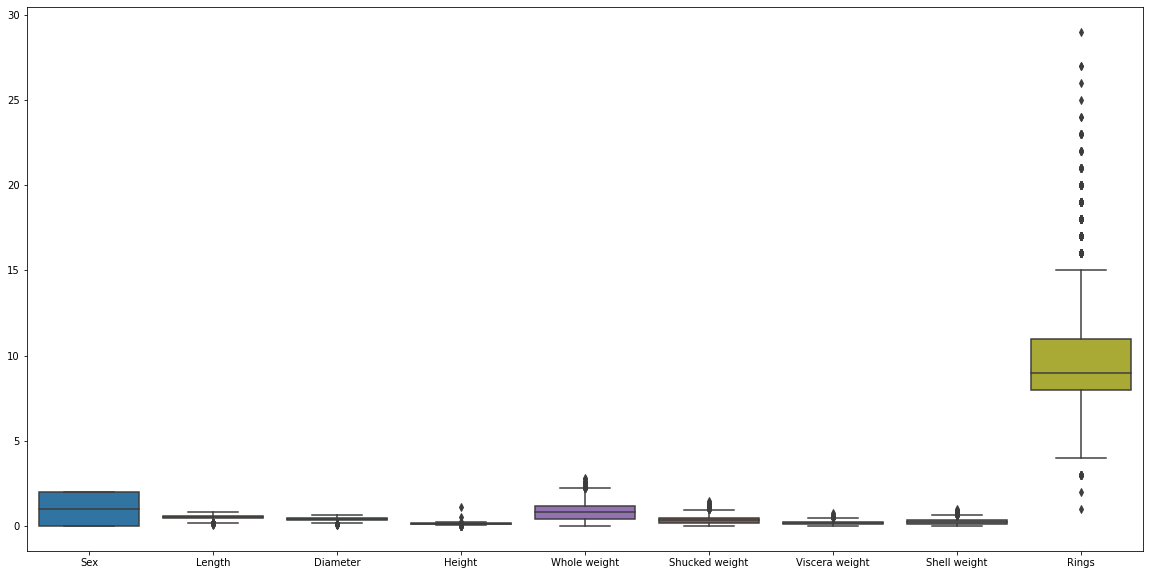

In [25]:
rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df)

## Observation
### Outliers present in data set, and should be processed before modelling

Sex                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Length            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Diameter          AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Height            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.168478x0.222059)
Shucked weight    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Viscera weight    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Shell weight      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Rings                   AxesSubplot(0.125,0.125;0.168478x0.222059)
dtype: object

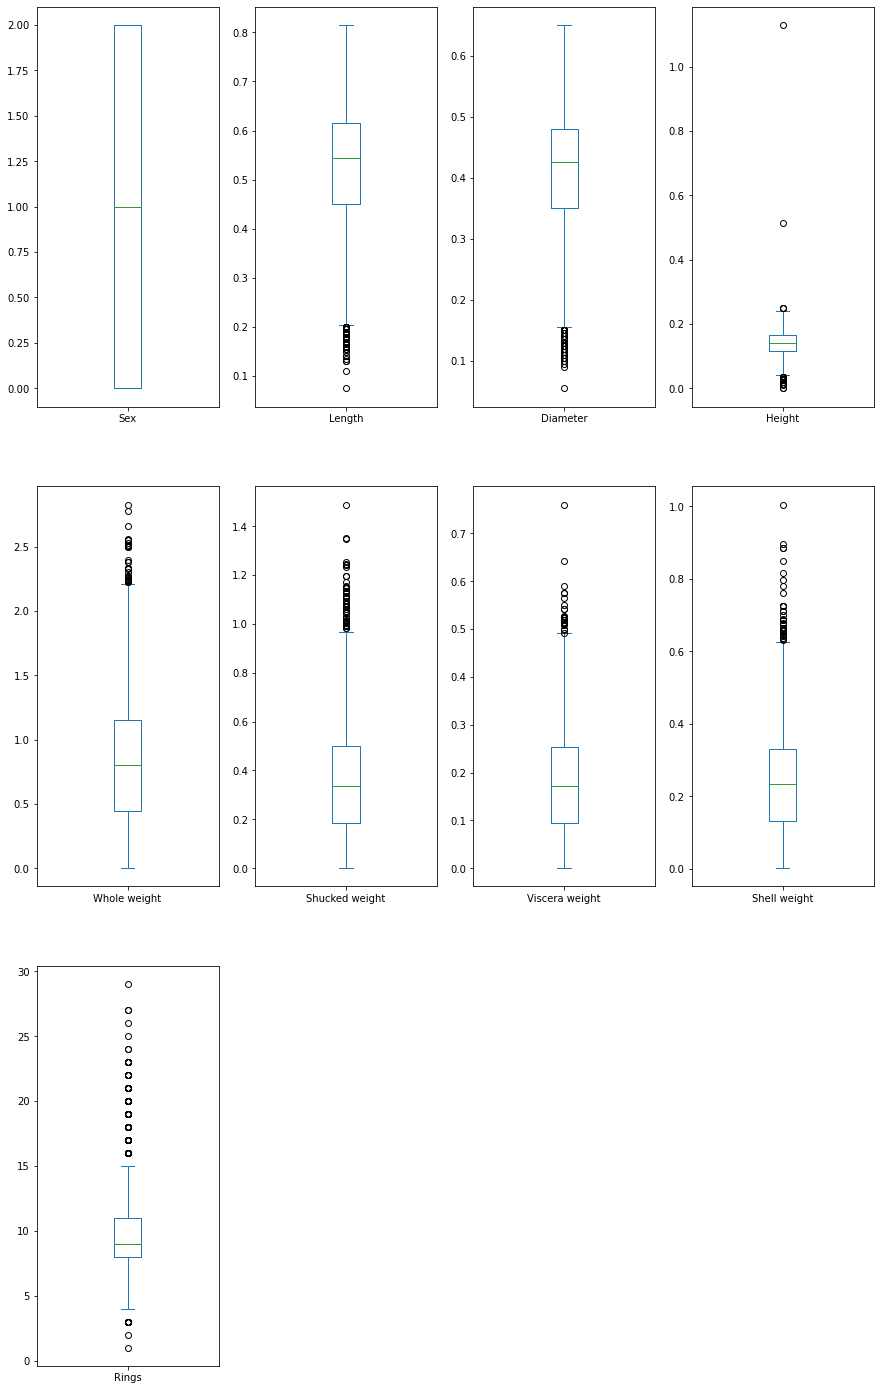

In [26]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))
# plotting individual graph for better understanding of graph

## observations:
    
### Height, Rings high outliers are present

### Length, Whole weight, Shucked weight, Viscera weight, Shell weight moderate outliers are present

# Skewness Checking

<AxesSubplot:xlabel='Sex', ylabel='Density'>

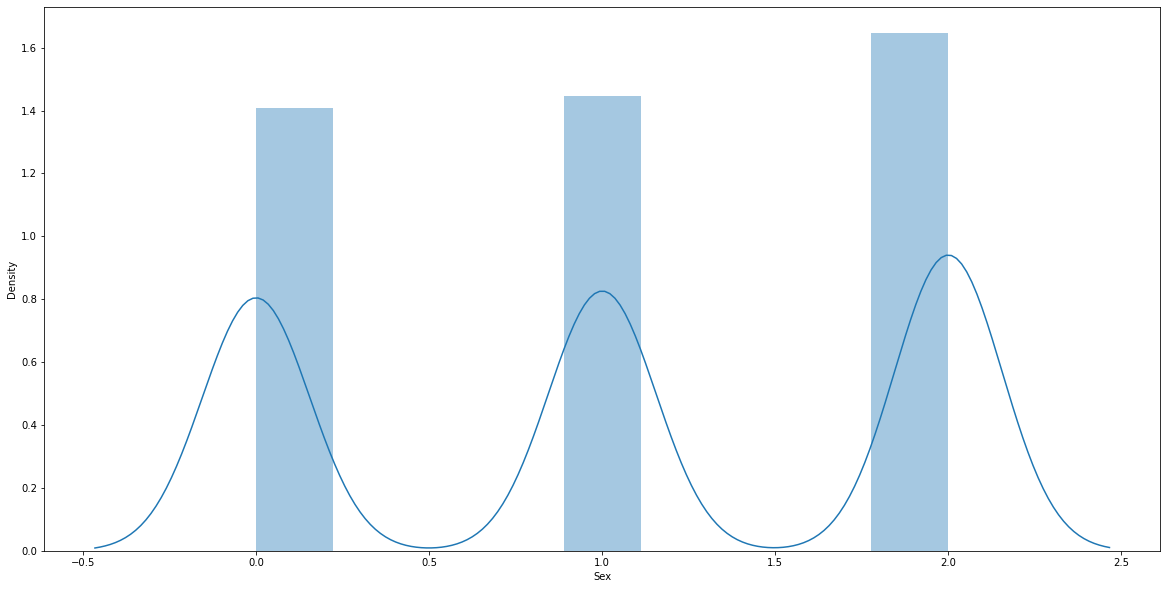

In [27]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Length', ylabel='Density'>

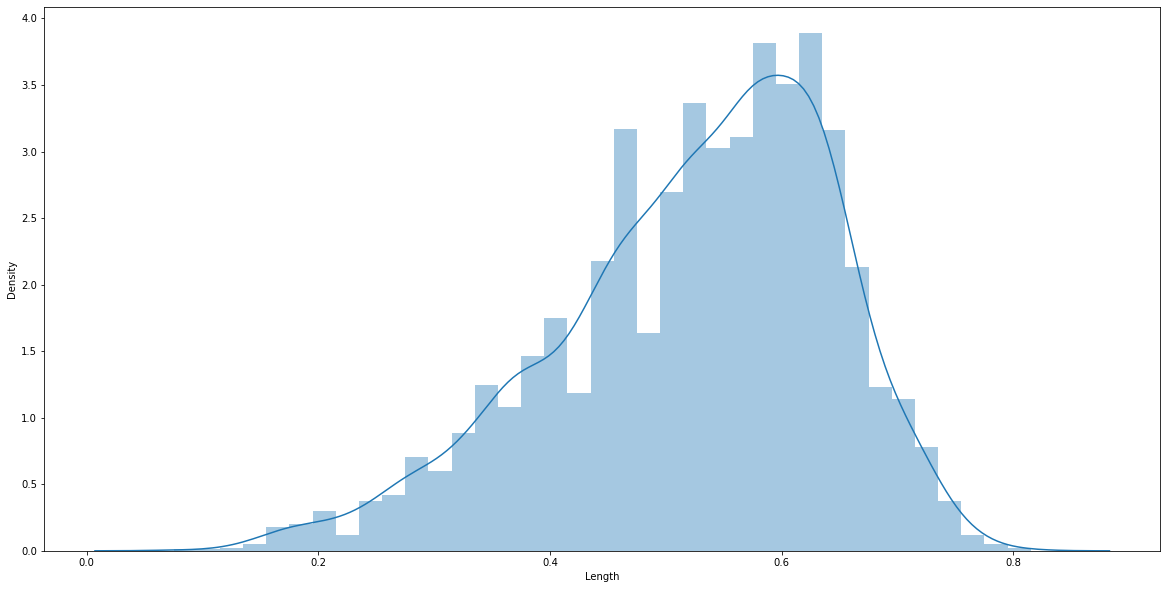

In [28]:
sns.distplot(df['Length'])

Data is left skewed

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

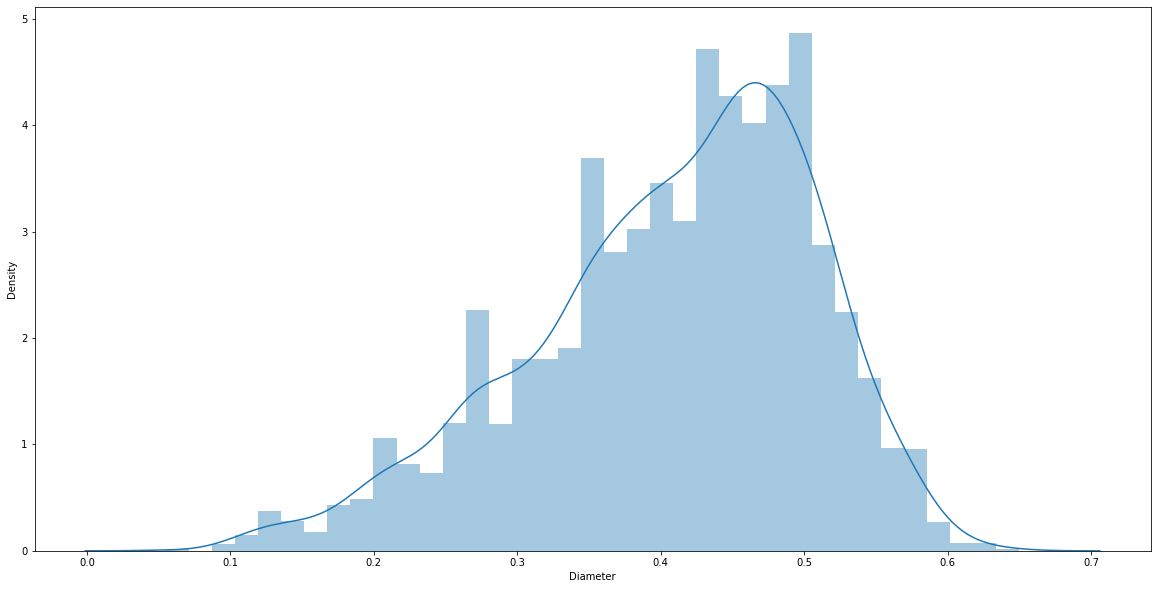

In [29]:
sns.distplot(df['Diameter'])

Data is left skewed

<AxesSubplot:xlabel='Height', ylabel='Density'>

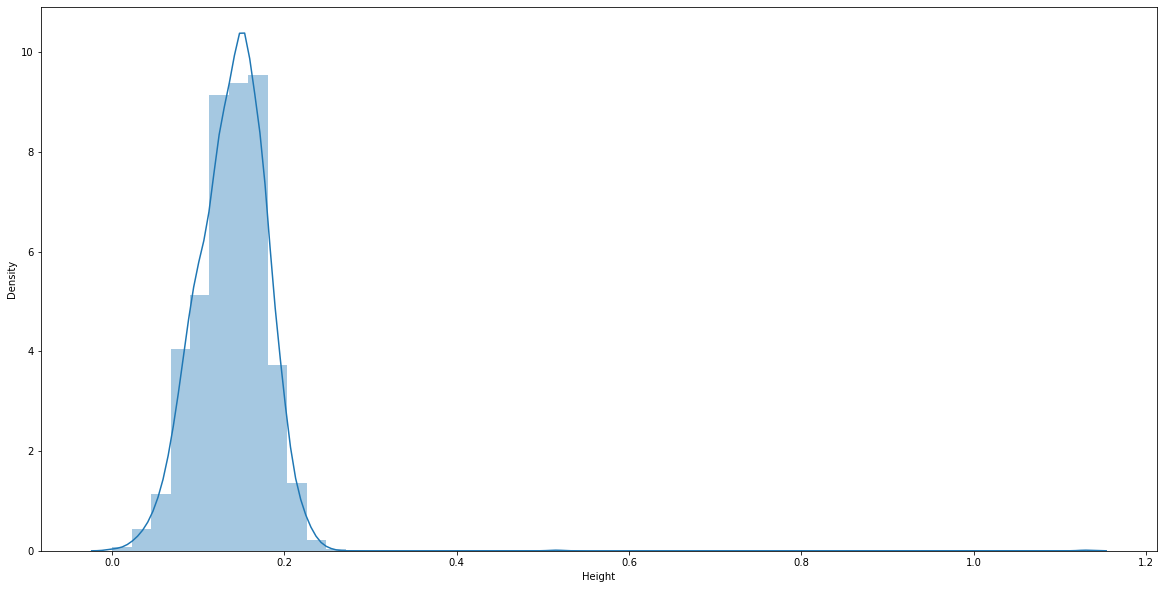

In [30]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

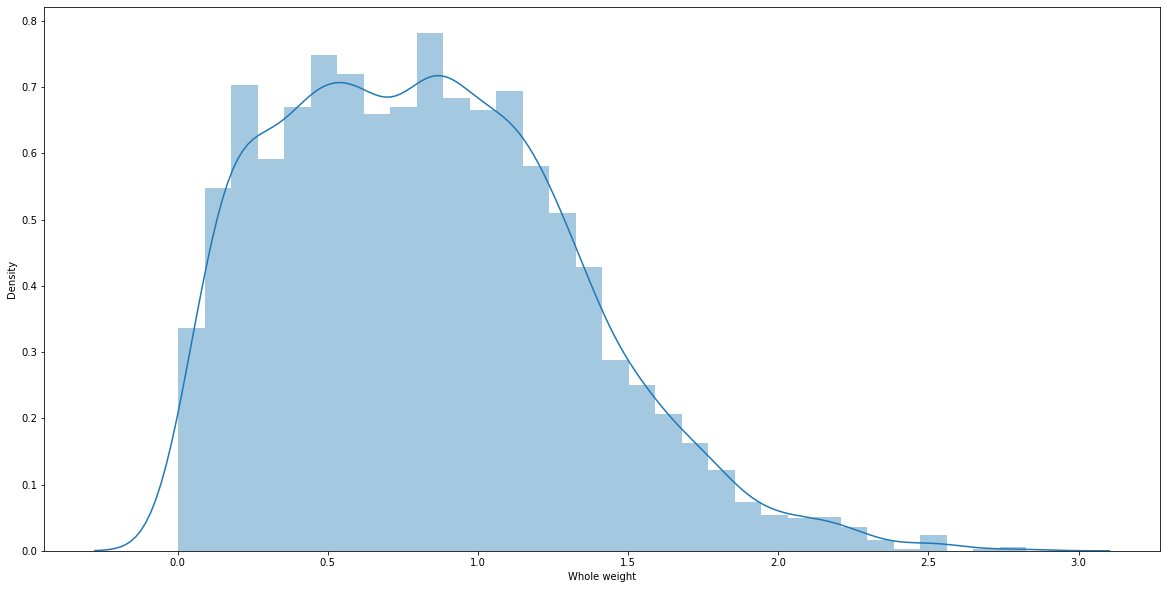

In [31]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

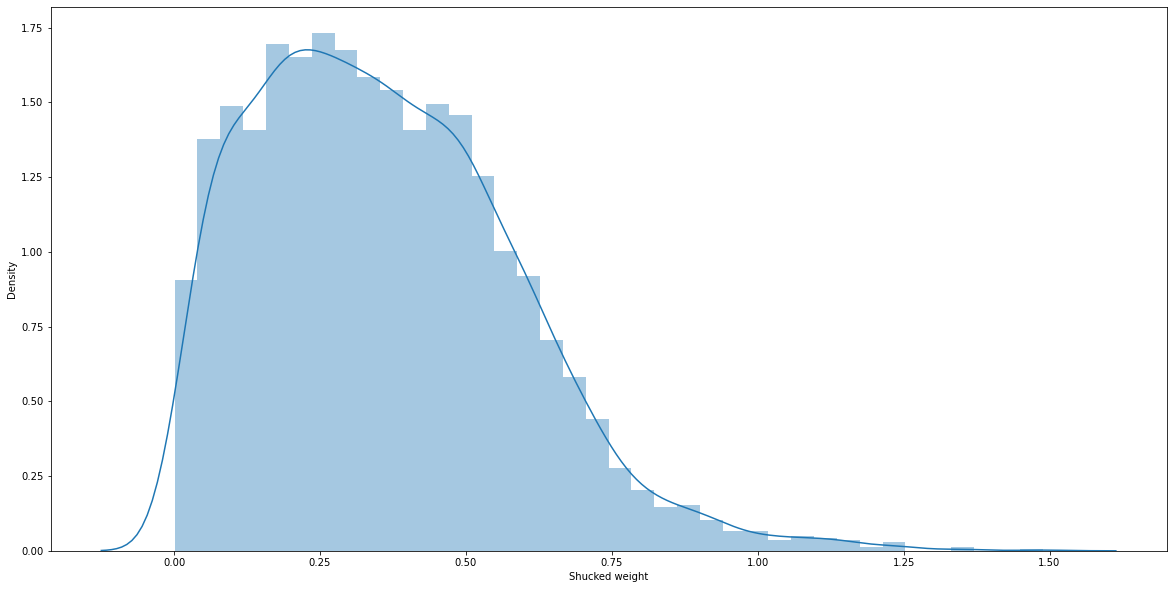

In [32]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

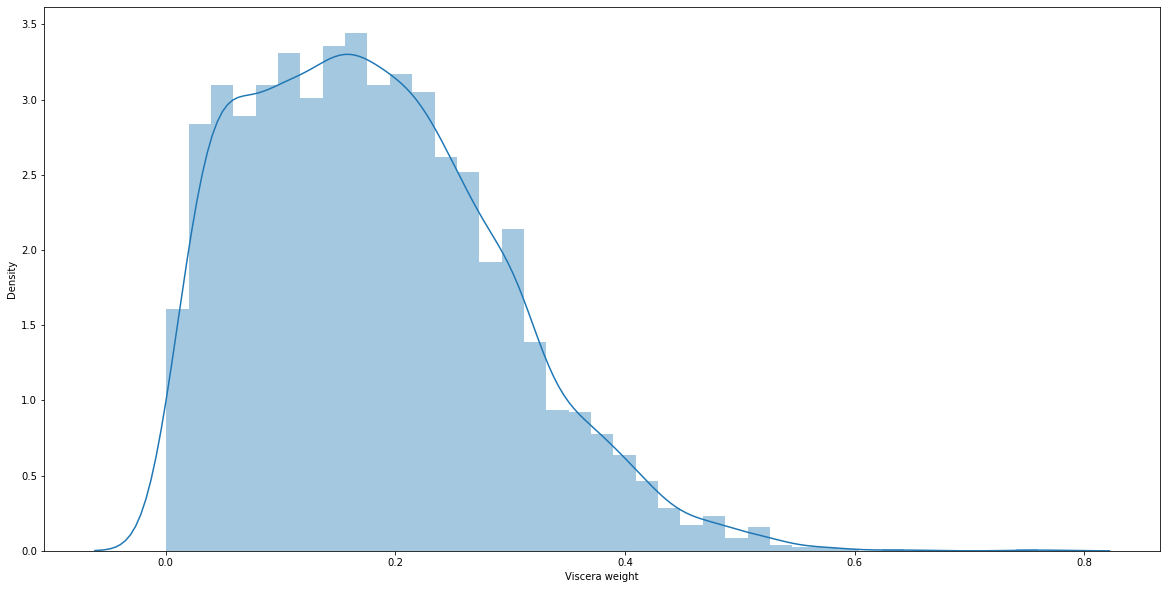

In [33]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

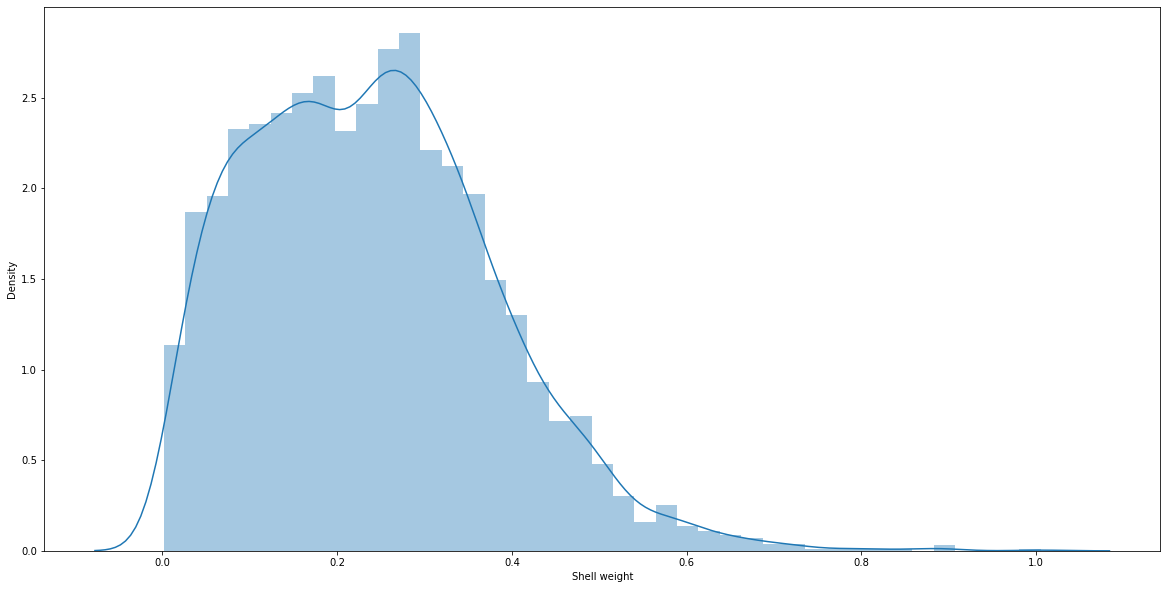

In [34]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

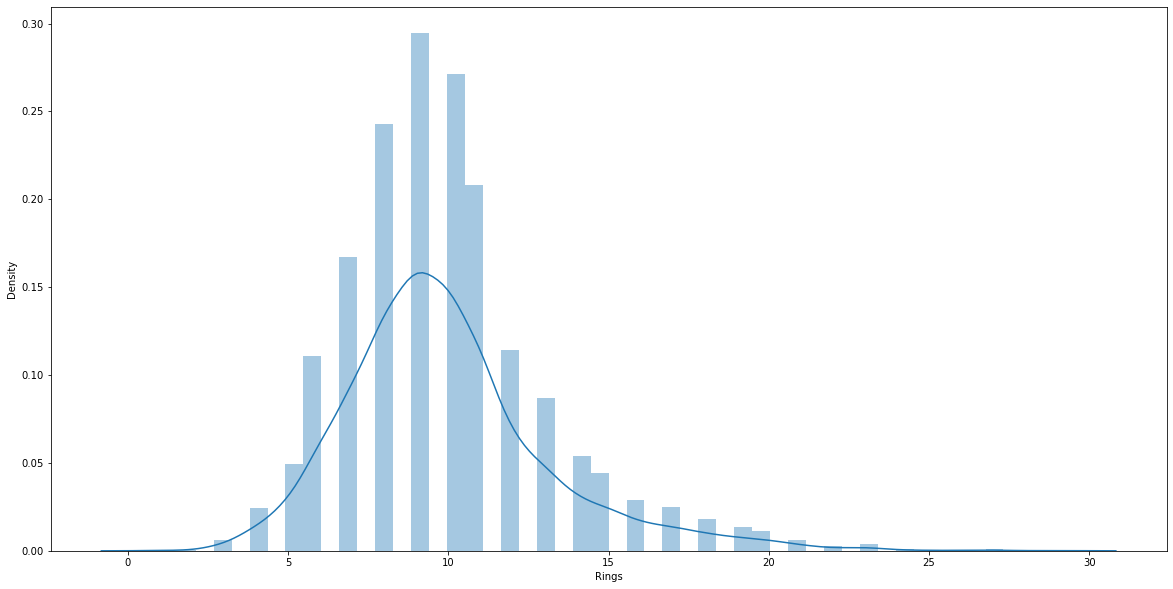

In [35]:
sns.distplot(df['Rings'])

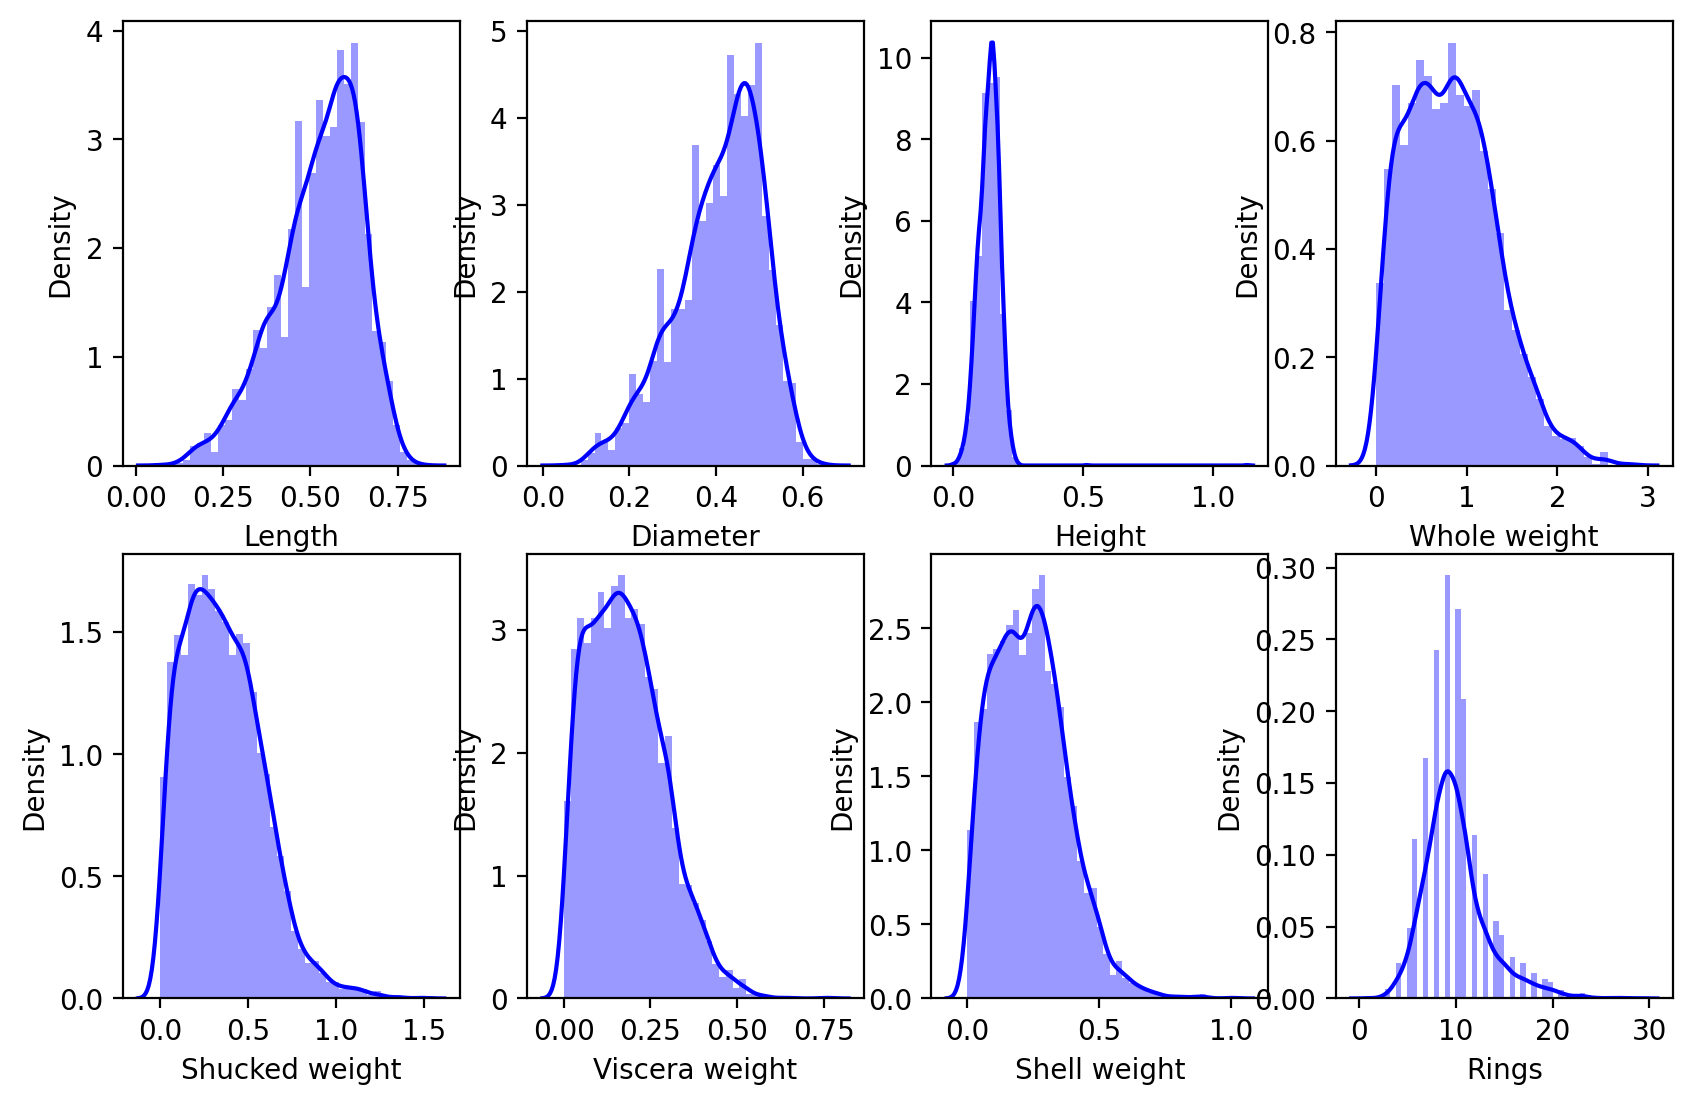

In [36]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(df[df.columns.drop('Sex')]):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

## Observations:

### Looking at the above distribution plots we can see that there is skewness due to the outliers which we saw in the boxplot. Still there are many that are showing a bell shape curve indicating a normal distribution.

# Histograms

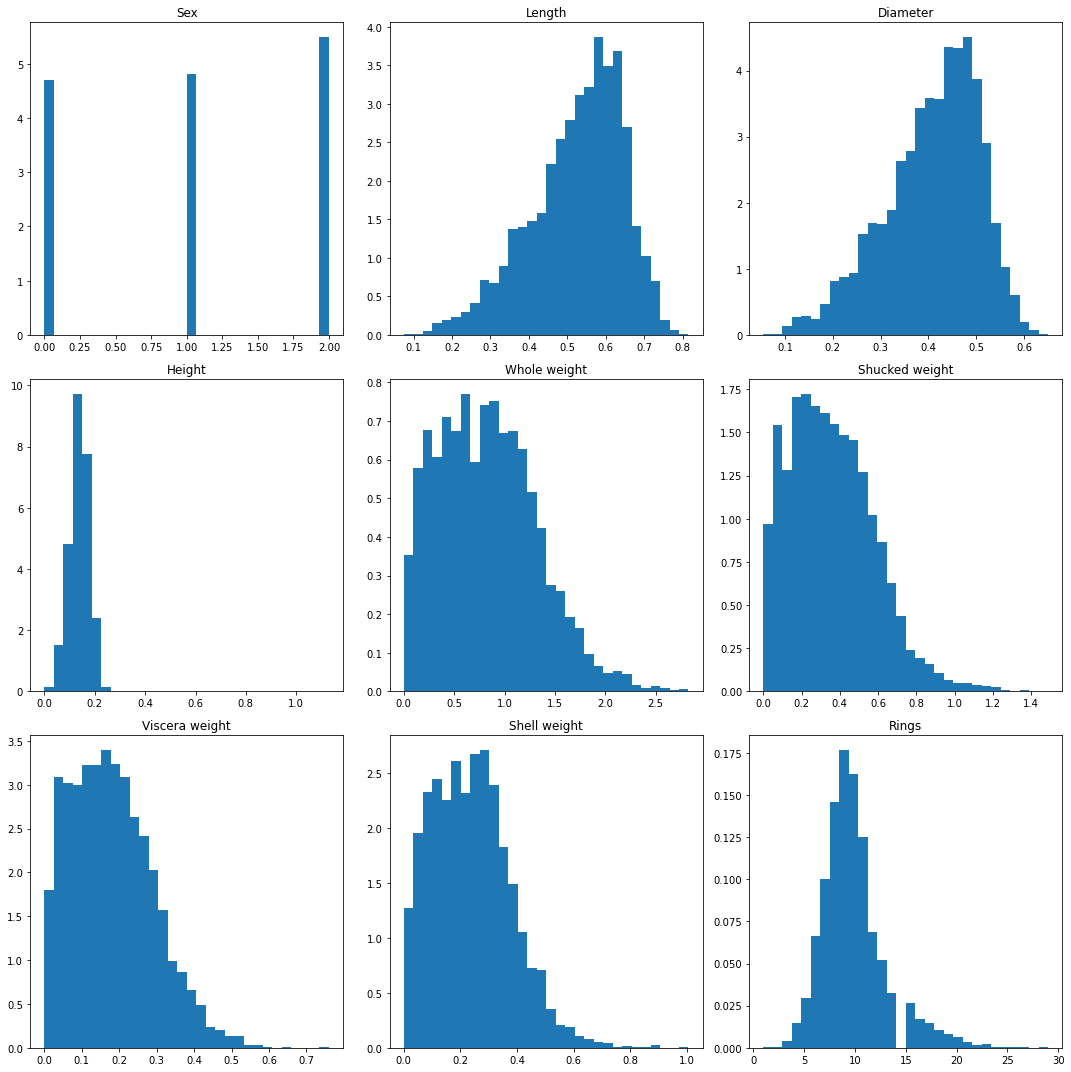

In [37]:
plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins = 30, density = 'True', label = 'Value',histtype = 'stepfilled', grid=False)
plt.tight_layout()
plt.show()

### In histogram we can see if any section is empty such as in Rings 15 number there was not enough data collected also we can see the skewness.

In [38]:
df.skew().sort_values()

Length           -0.639873
Diameter         -0.609198
Sex              -0.098155
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Shucked weight    0.719098
Rings             1.114102
Height            3.128817
dtype: float64

Observations:

Skewness threshold usually taken as -0.5 to 0.5

referring the above distplot and histogram graphs and values we can infer:
    
highly skewed :  Height, Rings
moderately skewed : Length, Diameter, Whole weight, Shucked weight, Viscera weight, Shell weight 

# MultiCollinearity with Variance Inflation Factor

In [39]:
df1=pd.DataFrame(data=df)       # copying the dataframe
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
x1=df1.iloc[:,:-1]  # Dropping last column from data frame
y1=df1.iloc[:,-1]

In [41]:
x1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [42]:
y1

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [43]:
x1.shape

(4177, 8)

In [44]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [45]:
calc_vif(x1)

,variables,VIF FACTOR
0,Sex,2.555356
1,Length,700.488988
2,Diameter,749.121626
3,Height,42.128924
4,Whole weight,421.652484
5,Shucked weight,101.674946
6,Viscera weight,63.585627
7,Shell weight,81.873737


In [46]:
x1=df1.drop(['Length'],axis=1)

In [47]:
calc_vif(x1)

,variables,VIF FACTOR
0,Sex,2.545465
1,Diameter,62.345278
2,Height,42.686825
3,Whole weight,435.305438
4,Shucked weight,117.303502
5,Viscera weight,64.541685
6,Shell weight,81.720804
7,Rings,21.594824


in between whole weight and shucked weight in corr heatmap shucked weight is giving less contribution hence it is dropped in VIF and changes in VIF are as follows

In [48]:
x1=df1.drop(['Length','Shucked weight'],axis=1)

In [49]:
calc_vif(x1)

,variables,VIF FACTOR
0,Sex,2.537687
1,Diameter,58.307130
2,Height,42.683678
3,Whole weight,131.971592
4,Viscera weight,59.346850
5,Shell weight,57.219277
6,Rings,18.686253


Observations:

From the above after removal of length and shucked weight we can see that the VIF decreases drastically. Although VIF is still high in the other columns we will need the other columns to predict the label Rings (Age) in our dataset

# Data Preprocessing

referring all the above EDA steps we have decided to drop 2 columns:
    
Length:
    
- in between length and diameter in correlation heatmap, length is giving less contribution
- moderate outliers are present
- moderately skewed observing the distplot, histogram and df.skew()
- High VIF factor

Shucked weight:

- in between whole weight and shucked weight in correlation heatmap, shucked weight is giving less contribution and its giving the least contribution compared to the other variables.
- moderate outliers are present
- moderately skewed observing the distplot, histogram and df.skew()
- High VIF factor

In [50]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [51]:
calc_vif(df)

,variables,VIF FACTOR
0,Sex,2.537687
1,Diameter,58.307130
2,Height,42.683678
3,Whole weight,131.971592
4,Viscera weight,59.346850
5,Shell weight,57.219277
6,Rings,18.686253


<AxesSubplot:>

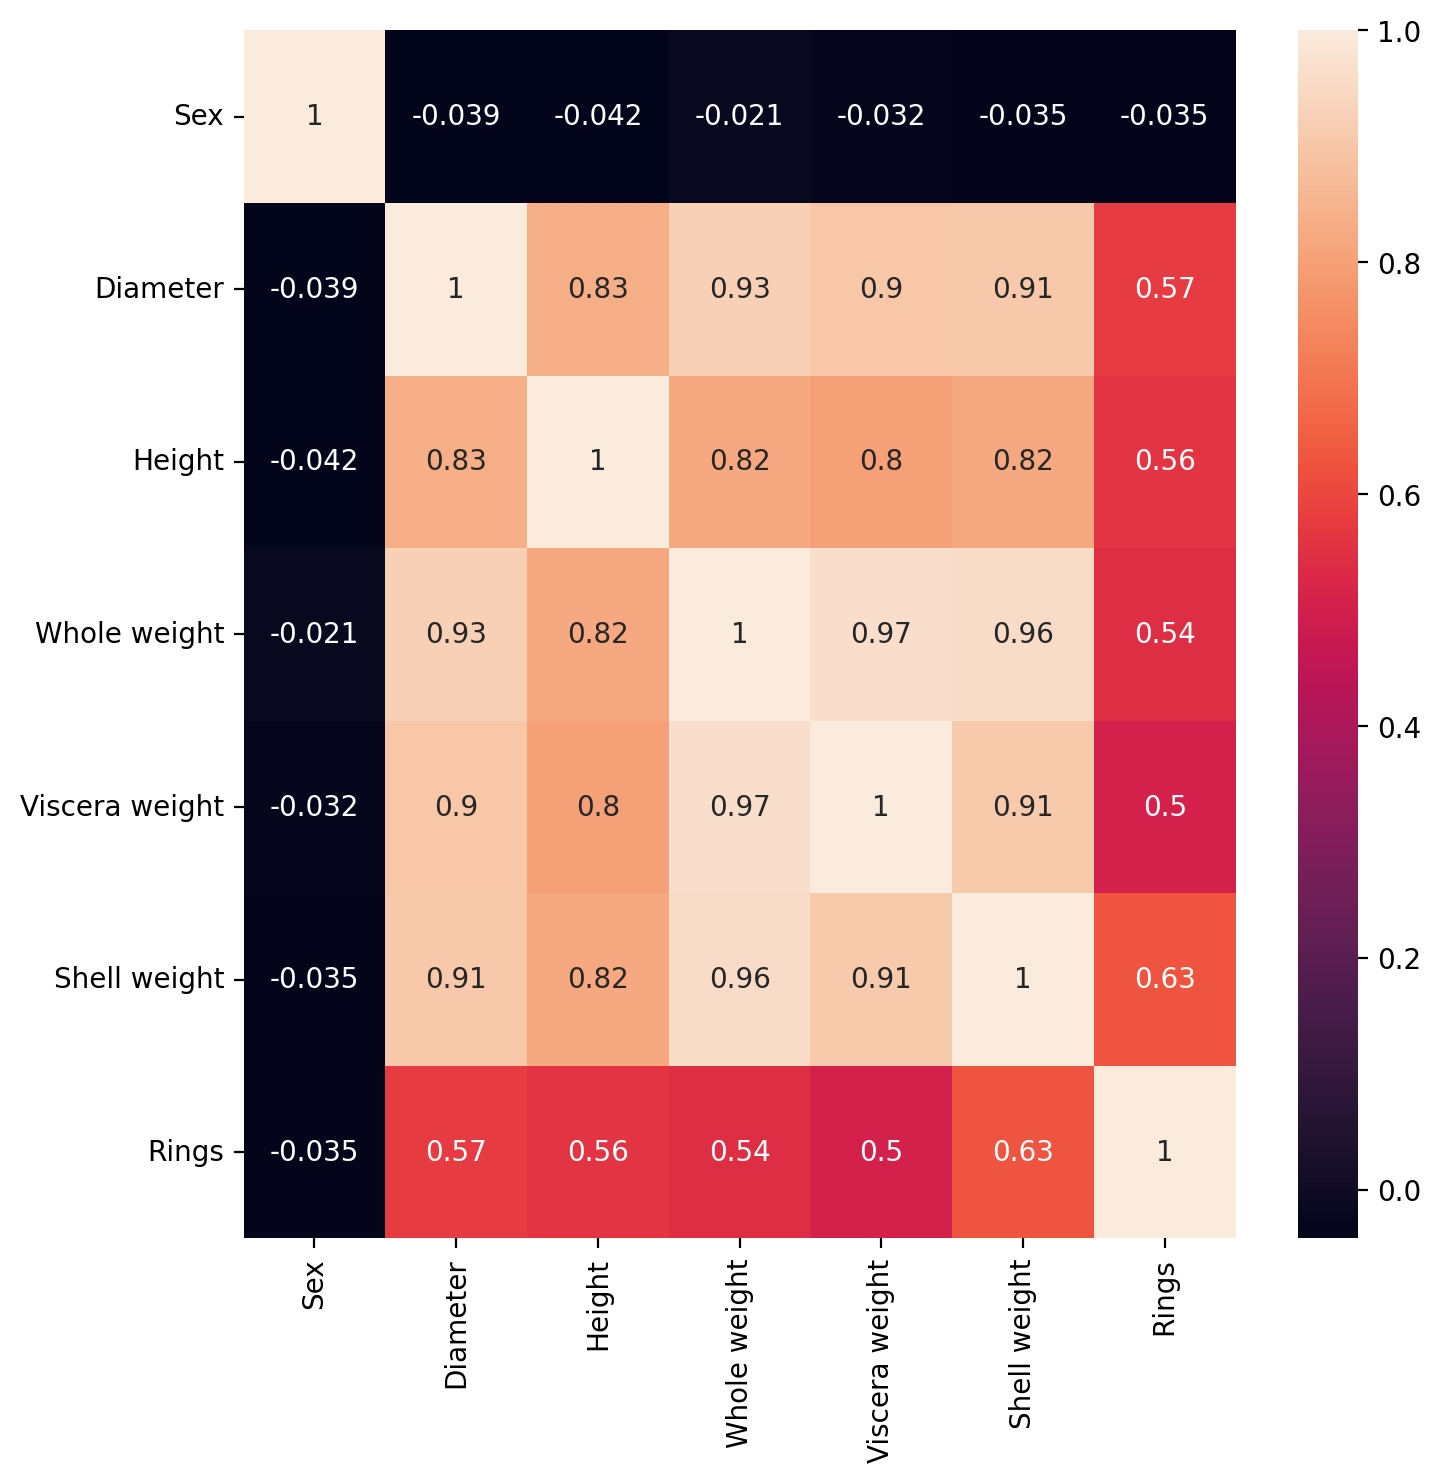

In [52]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

# Removing Outliers

In [53]:
z=np.abs(zscore(df))
z

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,1.151980,0.432149,1.064424,0.641898,0.726212,0.638217,1.571544
1,1.151980,1.439929,1.183978,1.230277,1.205221,1.212987,0.910013
2,1.280690,0.122130,0.107991,0.309469,0.356690,0.207139,0.289624
3,1.151980,0.432149,0.347099,0.637819,0.607600,0.602294,0.020571
4,0.064355,1.540707,1.423087,1.272086,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...
4172,1.280690,0.424464,0.609334,0.118813,0.532900,0.073062,0.330765
4173,1.151980,0.323686,0.107991,0.279929,0.309362,0.155685,0.020571
4174,1.151980,0.676409,1.565767,0.708212,0.975413,0.496955,0.289624
4175,1.280690,0.777187,0.250672,0.541998,0.733627,0.410739,0.020571


In [54]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148], dtype=int64)

In [55]:
z.iloc[6,6]

3.12251641377204

In [56]:
z.shape

(4177, 7)

In [57]:
len(np.where(z>3)[0])

148

In [58]:
# removing outliers
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (4177, 7)
New Dataframe (4050, 7)
total_dropped_rows 127


# Percentage data loss:

In [59]:
loss_percent=(4177-4050)/4177*100
print(loss_percent,'%')

3.040459660043093 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

3.04% data loss is acceptable.

## Splitting the dataset into Features and Target

In [60]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [61]:
X

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [62]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4050, dtype: int64

In [63]:
X.skew().sort_values()

Diameter         -0.598478
Height           -0.248237
Sex              -0.098078
Shell weight      0.365540
Whole weight      0.388193
Viscera weight    0.455795
dtype: float64

Observations:

Since the skewness is almost within permissible ranges and the outlier data are a real value we have proceeded with the X independant variables as it 

## Scaling the independant variable (x) to get all the columns in a standard scale

In [64]:
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 1.15682064, -0.42176554, -1.16116187, -0.63340556, -0.72366849,
        -0.63247034],
       [ 1.15682064, -1.45625586, -1.29557866, -1.25426925, -1.22524216,
        -1.25071252],
       [-1.28652934,  0.14720414, -0.08582761, -0.28262296, -0.33674023,
        -0.1687887 ],
       ...,
       [ 1.15682064,  0.71617382,  1.79600736,  0.79124525,  1.05811226,
         0.58855797],
       [-1.28652934,  0.81962285,  0.31742274,  0.61585395,  0.80493698,
         0.49582164],
       [ 1.15682064,  1.54376608,  1.5271738 ,  2.45369653,  1.90839906,
         2.03369908]])

since the different columns were out of scale we performed scaling operation on all the independant variables columns to bring it into the same scale.

We used Standard Scaler method to ensure all my independant variables columns have been standardized.

In [65]:
X.columns

Index(['Sex', 'Diameter', 'Height', 'Whole weight', 'Viscera weight',
       'Shell weight'],
      dtype='object')

In [66]:
x = pd.DataFrame(x1,columns=X.columns)

In [67]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,1.156821,-0.421766,-1.161162,-0.633406,-0.723668,-0.632470
1,1.156821,-1.456256,-1.295579,-1.254269,-1.225242,-1.250713
2,-1.286529,0.147204,-0.085828,-0.282623,-0.336740,-0.168789
3,1.156821,-0.421766,-0.354661,-0.629101,-0.599469,-0.593830
4,-0.064854,-1.559705,-1.564412,-1.298386,-1.311226,-1.366633
...,...,...,...,...,...,...
4045,-1.286529,0.457551,0.720673,0.169306,0.594754,0.132604
4046,1.156821,0.354102,-0.085828,0.339317,0.360686,0.221477
4047,1.156821,0.716174,1.796007,0.791245,1.058112,0.588558
4048,-1.286529,0.819623,0.317423,0.615854,0.804937,0.495822


# <span style="color:red;">Data is ready for Machine Learning Models</span>

# Since the y (Target) has continuous values we will use Linear Regression model

### Finding Best Random State

In [68]:
lr = LinearRegression()

In [69]:
random_state = []
training_accuracy = []
testing_accuracy = []

In [70]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))

In [71]:
lr_acc = pd.DataFrame()

In [72]:
lr_acc['random_state'] = random_state
lr_acc['training_accuracy'] = training_accuracy
lr_acc['testing_accuracy'] = testing_accuracy

In [73]:
lr_acc.sort_values('testing_accuracy').tail(1)

,random_state,training_accuracy,testing_accuracy
28,29,0.44,0.51


It is clear that for random state 29, we have highest testing accuracy

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=111)

In [75]:
lr.fit(x_train,y_train)

LinearRegression()

In [76]:
pred_test = lr.predict(x_test)

In [77]:
print(r2_score(y_test,pred_test))

0.4592576466121676


## Cross Validation of the model

In [78]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.45034800997599156
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 3 the cv score is 0.43452225180600995
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 4 the cv score is 0.3469035437579291
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 5 the cv score is 0.34819343213987397
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 6 the cv score is 0.3576054891731297
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 7 the cv score is 0.36705536696532487
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 8 the cv score is 0.33270699341954274
accuracy score for trainin

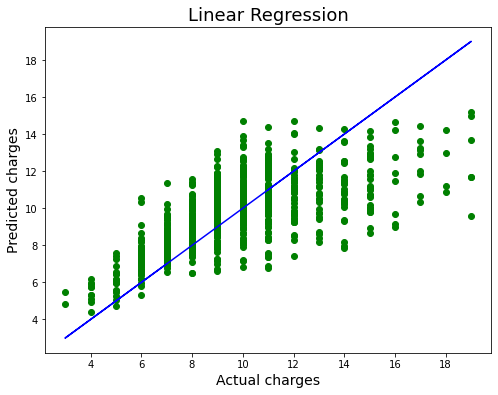

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The best fit line doesnt seem to be covering more than 50% of the points

## importing all the required libraries

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# Tuning parameter for better results

### Linear Regression

In [82]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 2.0480132293953295
R2 Score is: 45.92576466121676
Cross Validation Score is: 34.819343213987395
R2 Score - Cross Validation Score is 11.106421447229366


### L1 -- Lasso Regression

In [83]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.048008765073039
R2 Score is: 45.92600040632581
Cross Validation Score is: 34.820009085495485
R2 Score - Cross Validation Score is 11.105991320830327


### L2 -- Ridge Regression

In [84]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.0480132309371593
R2 Score is: 45.925764579798084
Cross Validation Score is: 34.819342723607846
R2 Score - Cross Validation Score is 11.106421856190238


### Elastic Net

In [85]:
model=ElasticNet(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.048014211497105
R2 Score is: 45.9257127998181
Cross Validation Score is: 34.81884518872511
R2 Score - Cross Validation Score is 11.106867611092987


# Support Vector Regression

In [86]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 1.9976979940627306
R2 Score is: 48.55009958553169
Cross Validation Score is: 43.260514030725375
R2 Score - Cross Validation Score is 5.289585554806315


In [87]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 2.2539031771652964
R2 Score is: 34.50692481260227
Cross Validation Score is: 25.709166224838803
R2 Score - Cross Validation Score is 8.797758587763468


In [88]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 2.0950858933777505
R2 Score is: 43.411453795052246
Cross Validation Score is: 35.74158909545571
R2 Score - Cross Validation Score is 7.669864699596538


# Decision Tree Regressor

In [89]:
model=DecisionTreeRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 2.8201217030038057
R2 Score is: -2.532270130035497
Cross Validation Score is: -13.902442771108865
R2 Score - Cross Validation Score is 11.370172641073367


# Random Forest Regressor

In [90]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1.9884574019843053
R2 Score is: 49.02497413614733
Cross Validation Score is: 38.2075509883113
R2 Score - Cross Validation Score is 10.817423147836031


# K Neighbors Regressor

In [91]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 2.035487626231909
R2 Score is: 46.585175635454966
Cross Validation Score is: 35.245010473175576
R2 Score - Cross Validation Score is 11.34016516227939


# SGD Regressor

In [92]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 2.1053242258985976
R2 Score is: 42.85702497435931
Cross Validation Score is: 24.881403800824568
R2 Score - Cross Validation Score is 17.975621173534744


# Gradient Boosting Regressor

In [93]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1.9787763518124455
R2 Score is: 49.52012225407601
Cross Validation Score is: 41.03229056598897
R2 Score - Cross Validation Score is 8.487831688087034


# Ada Boost Regressor

In [94]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 2.207468257919332
R2 Score is: 37.17770378528476
Cross Validation Score is: 17.517660474722106
R2 Score - Cross Validation Score is 19.660043310562656


# Extra Trees Regressor

In [95]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 1.9618647043415838
R2 Score is: 50.3792894094376
Cross Validation Score is: 39.17737949580135
R2 Score - Cross Validation Score is 11.20190991363625


# Hyper parameter tuning

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

## For Lasso Regressor

In [97]:
parameters = {'alpha':[100, 300], 'selection': ['cyclic', 'random'], 'max_iter': [500, 1000], 'random_state': [100, 500]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 100, 'max_iter': 500, 'random_state': 100, 'selection': 'cyclic'}


In [98]:
ls=Lasso(alpha=100,random_state=100,max_iter=500,selection='cyclic')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

ls1 = r2_score(y_test,pred_ls)
ls1

-0.0007923230386850388

In [99]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.16837090545933736

## For Random Forest Regressor

In [100]:
parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [101]:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Validation Score:',rfc*100)

R2 Score: 50.97024622387751
Cross Validation Score: 39.74103579697227


# For Gradient Boosting

In [102]:
clf_gb=GridSearchCV(estimator=GradientBoostingRegressor(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [500]})

In [103]:
clf_gb.best_score_

0.4562538986717312

In [104]:
clf_gb.best_params_

{'n_estimators': 500}

In [105]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.048462,0.043455,0.002871,0.000871,500,{'n_estimators': 500},0.402984,0.43338,0.442168,0.523718,0.499457,0.461389,0.469686,0.399156,0.487378,0.443223,0.456254,0.038187,1


# From all above models, Random Forest Regressor gives result 50.97%. So choosen this model for prediction

## By adding 1.5 in rings, we get age of abalone.